In [5]:
import numpy as np
from Turbinen_class_file import Francis_turbine_class
#importing pressure conversion function
import sys
import os
current = os.path.dirname(os.path.realpath('Main_Programm.ipynb'))
parent = os.path.dirname(current)
sys.path.append(parent)
from functions.pressure_conversion import pressure_conversion
from matplotlib import pyplot as plt

p_exp=0.75
cubic_coeff=-0.7157
quadratic_coeff=0.9374
linear_coeff=0.9696
const_coeff=-0.0011
T1 = Francis_turbine_class()
T1.set_turbine_flux_parameters(p_exp,cubic_coeff,quadratic_coeff,linear_coeff,const_coeff)

pressure,_ = pressure_conversion(5,'bar','Pa')

LA_vec      = np.array([0,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.,1.05,1.1,1.15])/1.18
flux_vec1   = np.empty_like(LA_vec)

n = np.size(flux_vec1)
for i in range(n):
    flux_vec1[i] = T1.get_turbine_flux(pressure,LA_vec[i])

LA = 0.5
pressure_vec = np.linspace(0,pressure,500)
flux_vec2   = np.empty_like(pressure_vec)
m = np.size(flux_vec2)

for i in range(m):
    flux_vec2[i] = T1.get_turbine_flux(pressure_vec[i],LA)


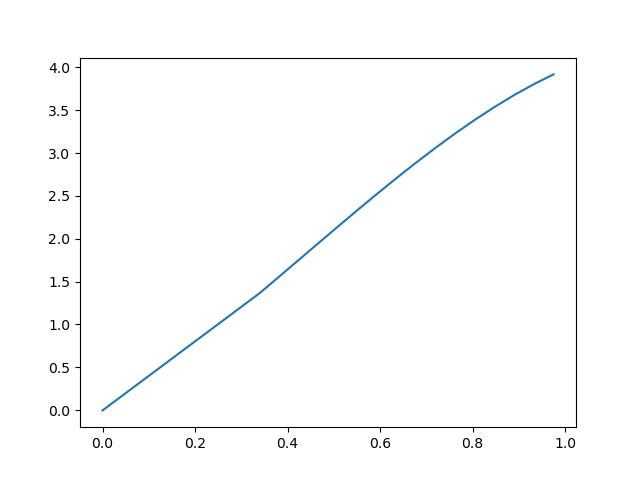

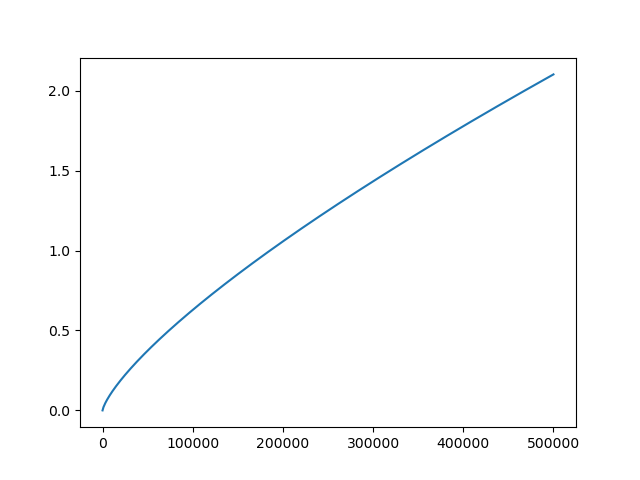

In [6]:
%matplotlib widget
fig1 = plt.figure()
plt.plot(LA_vec,flux_vec1)

fig2 = plt.figure()
plt.plot(pressure_vec,flux_vec2)

In [7]:
print(LA_vec)
print(flux_vec1)

[0.         0.33898305 0.38135593 0.42372881 0.46610169 0.50847458
 0.55084746 0.59322034 0.63559322 0.6779661  0.72033898 0.76271186
 0.80508475 0.84745763 0.88983051 0.93220339 0.97457627]
[-3.67807168e-03  1.36227725e+00  1.55581498e+00  1.75077663e+00
  1.94606981e+00  2.14060215e+00  2.33328126e+00  2.52301477e+00
  2.70871029e+00  2.88927545e+00  3.06361786e+00  3.23064514e+00
  3.38926492e+00  3.53838482e+00  3.67691244e+00  3.80375543e+00
  3.91782138e+00]
